# ICS 485 Course Project:
Ahmed Alzuhair ID: 202278540
Abdulaziz Alqahtani

In [1]:
import pandas as pd


df = pd.read_csv("dataset-train-vf.csv")

df_test = pd.read_csv("dataset-test-vf.csv")

print("train dataset shape:", df.shape)

print("test dataset shape:", df_test.shape)

print("Training dataset")
display(df.head())

print("Testing Dataset")
df_test.head()


train dataset shape: (4480, 13)
test dataset shape: (792, 12)
Training dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,1,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,NaN,C1,square
1,2,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,NaN,C2,square
2,3,0.000729,1449,196.3,0.841,0.172727,795,0.420000,0.112528,16240,NaN,C2,square
3,4,0.043499,24702,349.7,0.594,5.254545,9570,7.160000,2.417831,239680,0.430355,C3,circle
4,5,0.000972,1104,162.5,0.792,0.109091,570,0.320000,0.066930,12040,NaN,C3,square


Testing Dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4


## Data Analysis and Preprocessing

<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-1180353275.py:6: SyntaxWarning: invalid escape sequence '\T'
  print("\Testing Missing values per column:\n", df_test.isna().sum())



Training Missing values per column:
 ID        0
f1     1838
f2        0
f3     1384
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10    3912
f11       0
y         0
dtype: int64
\Testing Missing values per column:
 ID       0
f1     306
f2       0
f3     243
f4       0
f5       0
f6       0
f7       0
f8       0
f9       0
f10    668
f11      0
dtype: int64

Statistics:
                 ID           f1            f2           f3           f4  \
count  4480.000000  2642.000000  4.480000e+03  3096.000000  4480.000000   
mean   2240.500000     0.007127  2.559716e+04   234.375598     0.786005   
std    1293.408932     0.009138  9.400564e+04   106.207714     0.163220   
min       1.000000     0.000081  1.610000e+02    35.750000     0.062000   
25%    1120.750000     0.001397  2.783000e+03   170.300000     0.681000   
50%    2240.500000     0.003321  7.590000e+03   218.075000     0.802500   
75%    3360.250000     0.008586  2.270100e+04   271.050000     0.920000 

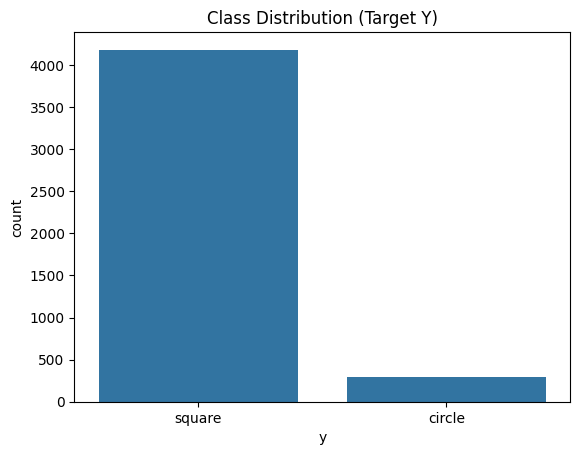

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Missing values per column:\n", df.isna().sum())

print("\Testing Missing values per column:\n", df_test.isna().sum())

print("\nStatistics:\n", df.describe())


# Class distribution
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution (Target Y)")
plt.show()

In [3]:
df_test

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4
...,...,...,...,...,...,...,...,...,...,...,...,...
787,5268,0.017578,64883,234.65,0.686,9.263636,29010,18.806667,4.922775,665700,NaN,C2
788,5269,0.024139,54832,157.30,0.791,5.236364,28290,15.893333,3.208563,597800,NaN,C2
789,5270,0.000405,1265,425.75,0.727,0.327273,600,0.366667,0.184310,13300,0.581246,C4
790,5271,0.004374,11178,124.15,0.741,0.845455,5400,3.240000,0.485303,118440,NaN,C2


### *2.1 Data Cleaning*

In [4]:
# Drop ID (since it is not useful)
# + drop f10 (missing 3912/4480 which is a lot that we cannot recover)
df = df.drop(columns=["ID", "f10"])

## remove from test data columns
df_test = df_test.drop(columns=["ID", "f10"])

print(df.head())

         f1     f2     f3     f4        f5     f6         f7        f8  \
0       NaN  62330    NaN  0.748  4.845455  30405  18.066667  2.807634   
1       NaN   4370    NaN  0.858  1.072727   2445   1.266667  0.712986   
2  0.000729   1449  196.3  0.841  0.172727    795   0.420000  0.112528   
3  0.043499  24702  349.7  0.594  5.254545   9570   7.160000  2.417831   
4  0.000972   1104  162.5  0.792  0.109091    570   0.320000  0.066930   

       f9 f11       y  
0  663180  C1  square  
1   49420  C2  square  
2   16240  C2  square  
3  239680  C3  circle  
4   12040  C3  square  


### *_* Data Spliting

In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(X_train.shape, X_val.shape)

numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)




(3808, 10) (672, 10)
Numeric: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
Categorical: ['f11']


### 2.2 Filling NaN Values

Impute the cols that have missing values, since the missing values are in coloumns f1 and f3 are all numeric then take the median

In [6]:
from sklearn.experimental import enable_iterative_imputer  # required import
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Initialize IterativeImputer
iter_imputer = IterativeImputer(
	estimator=RandomForestRegressor(
		n_estimators=50,
		random_state=42,
		n_jobs=-1
	),
	max_iter=10,
	random_state=42
)

# Impute missing values in numeric columns of X_train
X_train[numeric_cols] = iter_imputer.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = iter_imputer.transform(X_val[numeric_cols])

# Impute missing values in numeric columns of df_test using the same imputer
df_test[numeric_cols] = iter_imputer.transform(df_test[numeric_cols])

X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11
120,0.005427,18492.0,244.400,0.751,2.745455,9060.0,5.360000,1.597197,197120.0,C4
826,0.008424,19136.0,373.750,0.870,4.345455,10860.0,5.546667,2.928592,217840.0,C3
3034,0.010693,27324.0,109.200,0.693,1.809091,12345.0,7.920000,0.971176,281540.0,C2
2117,0.002349,4002.0,273.000,0.937,0.663636,2445.0,1.160000,0.481697,47180.0,C4
3715,0.002997,6808.0,243.750,0.753,1.009091,3345.0,1.973333,0.588613,72660.0,C4
...,...,...,...,...,...,...,...,...,...,...
1925,0.000786,1449.0,247.650,0.857,0.218182,810.0,0.420000,0.144845,16380.0,C4
2908,0.000972,2208.0,277.550,0.906,0.372727,1305.0,0.640000,0.261592,25620.0,C1
2141,0.008100,25300.0,289.263,0.882,4.727273,14550.0,7.333333,3.229859,289800.0,C4
3870,0.003402,8694.0,249.600,0.817,1.318182,4635.0,2.520000,0.834261,96180.0,C4


In [7]:

import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Missing values per column:\n", X_train.isna().sum())

print("\Testing Missing values per column:\n", df_test.isna().sum())


Training Missing values per column:
 f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f11    0
dtype: int64
\Testing Missing values per column:
 f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f11    0
dtype: int64


<>:6: SyntaxWarning: invalid escape sequence '\T'
<>:6: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3388375747.py:6: SyntaxWarning: invalid escape sequence '\T'
  print("\Testing Missing values per column:\n", df_test.isna().sum())


### 2.3 One-hot-encoding for categorical columns

In [8]:
X_train_dum = pd.get_dummies(X_train[categorical_cols], prefix=categorical_cols)
X_val_dum = pd.get_dummies(X_val[categorical_cols], prefix=categorical_cols)
df_test_dum = pd.get_dummies(df_test[categorical_cols], prefix=categorical_cols)

## Drop the coulumns we did one hot encoding for (categorical)
X_train_encoded = X_train.drop(columns=categorical_cols)
X_val_encoded = X_val.drop(columns=categorical_cols)
df_test_encoded = df_test.drop(columns=categorical_cols)


### Make the y's as 0 and 1s
y_train = y_train.map({"square": 0, "circle": 1})
y_val = y_val.map({"square": 0, "circle": 1})

X_train_encoded

,f1,f2,f3,f4,f5,f6,f7,f8,f9
120,0.005427,18492.0,244.400,0.751,2.745455,9060.0,5.360000,1.597197,197120.0
826,0.008424,19136.0,373.750,0.870,4.345455,10860.0,5.546667,2.928592,217840.0
3034,0.010693,27324.0,109.200,0.693,1.809091,12345.0,7.920000,0.971176,281540.0
2117,0.002349,4002.0,273.000,0.937,0.663636,2445.0,1.160000,0.481697,47180.0
3715,0.002997,6808.0,243.750,0.753,1.009091,3345.0,1.973333,0.588613,72660.0
...,...,...,...,...,...,...,...,...,...
1925,0.000786,1449.0,247.650,0.857,0.218182,810.0,0.420000,0.144845,16380.0
2908,0.000972,2208.0,277.550,0.906,0.372727,1305.0,0.640000,0.261592,25620.0
2141,0.008100,25300.0,289.263,0.882,4.727273,14550.0,7.333333,3.229859,289800.0
3870,0.003402,8694.0,249.600,0.817,1.318182,4635.0,2.520000,0.834261,96180.0


### 2.4 Scale the numeric columns

In [9]:
from sklearn.preprocessing import StandardScaler

# scale the numeric columns
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_encoded)
X_val_num = scaler.fit_transform(X_val_encoded)

df_test_num = scaler.transform(df_test_encoded)


X_train_num = pd.DataFrame(X_train_num, columns=X_train_encoded.columns, index=X_train_encoded.index)
X_val_num = pd.DataFrame(X_val_num, columns=X_val_encoded.columns, index=X_val_encoded.index)
df_test_num = pd.DataFrame(df_test_num, columns=df_test_encoded.columns, index=df_test_encoded.index)

In [10]:
import numpy as np

# concat non numeric with numeric
X_train_scaled = pd.concat([X_train_num, X_train_dum], axis=1)
X_val_scaled = pd.concat([X_val_num, X_val_dum], axis=1)
df_test_scaled = pd.concat([df_test_num, df_test_dum], axis =1)



### 2.6 Feature Selection


### 2.7 Resolve unbalance

In [11]:
from imblearn.over_sampling import SMOTE

## Use SMOTE for class imbalance
sm = SMOTE(random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", np.bincount(pd.factorize(y_train)[0]))
print("After SMOTE:", np.bincount(pd.factorize(y_train_bal)[0]))

X_train_scaled = X_train_bal
y_train_res = y_train_bal



Before SMOTE: [3554  254]
After SMOTE: [3554 3554]


In [12]:
y_train

,y
120,0
826,0
3034,0
2117,0
3715,0
...,...
1925,0
2908,0
2141,0
3870,0


## Models and Training

In [13]:
for df_name in ['X_train_scaled', 'X_val_scaled', 'df_test_scaled']:
    df = globals()[df_name]
    # Identify boolean columns
    boolean_cols = df.select_dtypes(include='bool').columns.tolist()
    # Convert boolean columns to integer (0 or 1)
    for col in boolean_cols:
        df[col] = df[col].astype(int)
    print(f"Data types after conversion for {df_name}:\n{df.dtypes.tail()}\n")

# Display the head of X_train to confirm changes
X_train_scaled.head()

Data types after conversion for X_train_scaled:
f9        float64
f11_C1      int64
f11_C2      int64
f11_C3      int64
f11_C4      int64
dtype: object

Data types after conversion for X_val_scaled:
f9        float64
f11_C1      int64
f11_C2      int64
f11_C3      int64
f11_C4      int64
dtype: object

Data types after conversion for df_test_scaled:
f9        float64
f11_C1      int64
f11_C2      int64
f11_C3      int64
f11_C4      int64
dtype: object



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11_C1,f11_C2,f11_C3,f11_C4
0,-0.193776,-0.071576,0.121183,-0.214962,-0.025296,-0.063132,-0.071576,-0.020791,-0.072084,0,0,0,1
1,0.147561,-0.063198,1.395032,0.514906,0.159999,0.018334,-0.063198,0.238050,-0.039969,0,0,1,0
2,0.405871,0.043326,-1.210277,-0.570695,-0.133735,0.085544,0.043326,-0.142498,0.058761,0,1,0,0
3,-0.544339,-0.260088,0.402838,0.925839,-0.266389,-0.362520,-0.260088,-0.237659,-0.304478,0,0,0,1
4,-0.470536,-0.223582,0.114782,-0.202695,-0.226382,-0.321787,-0.223582,-0.216874,-0.264987,0,0,0,1


### KNN:

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}



In [15]:
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train_res)

print("Best hyperparameters:", grid.best_params_)


Best hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [16]:
best_knn = grid.best_estimator_

val_f1 = grid.best_score_

print("Cross-validated F1-score from GridSearchCV:", val_f1)

Cross-validated F1-score from GridSearchCV: 0.955262285020496


In [17]:
y_test_pred = best_knn.predict(df_test_scaled)
y_test_pred.size

792

In [18]:
submission = pd.read_csv("Submission.csv")
submission["y"] = y_test_pred
submission.to_csv("Submission_knn.csv", index=False)


### SVM

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, confusion_matrix

Cs = [0.1, 1, 10, 100]
degrees = [1, 2, 3, 4] # used mainly for 'poly'
gammas = ["scale", "auto"] # used for 'rbf' and 'poly'
coef0s = [0.0, 0.5, 1.0] # used mainly for 'poly'

best_f1_svm = -1.0
best_params_svm = None
best_svm_model = None
results = []

# --- Linear kernel ---
for C in Cs:
	model = SVC(kernel="linear", C=C, random_state=777)
	model.fit(X_train_scaled, y_train_res)

	val_pred = model.predict(X_val_scaled)
	f1 = f1_score(y_val, val_pred)

	results.append(("linear", {"C": C}, f1))

	print(f"Params --> kernel=linear, C={C}")
	print(f"    --> F1 Score: {f1:.5f}\n")

	if f1 > best_f1_svm:
		best_f1_svm = f1
		best_params_svm = ("linear", {"C": C})
		best_svm_model = model

# --- Polynomial kernel ---
for C in Cs:
	for d in degrees:
		for g in gammas:
			for c0 in coef0s:   # <-- coef0 belongs ONLY here

				model = SVC(
					kernel="poly",
					C=C,
					degree=d,
					gamma=g,
					coef0=c0,          # <-- apply coef0 here
					random_state=777
				)

				model.fit(X_train_scaled, y_train_res)

				val_pred = model.predict(X_val_scaled)
				f1 = f1_score(y_val, val_pred)

				results.append(("poly", {"C": C, "degree": d, "gamma": g, "coef0": c0}, f1))

				print(f"Params --> kernel=poly, C={C}, degree={d}, gamma={g}, coef0={c0}")
				print(f"    --> F1 Score: {f1:.5f}\n")

				if f1 > best_f1_svm:
					best_f1_svm = f1
					best_params_svm = ("poly", {"C": C, "degree": d, "gamma": g, "coef0": c0})
					best_svm_model = model

# --- RBF kernel ---
for C in Cs:
	for g in gammas:
		model = SVC(kernel="rbf", C=C, gamma=g, random_state=777)
		model.fit(X_train_scaled, y_train_res)

		val_pred = model.predict(X_val_scaled)
		f1 = f1_score(y_val, val_pred)

		results.append(("rbf", {"C": C, "gamma": g}, f1))

		print(f"Params --> kernel=rbf, C={C}, gamma={g}")
		print(f"    --> F1 Score: {f1:.5f}\n")

		if f1 > best_f1_svm:
			best_f1_svm = f1
			best_params_svm = ("rbf", {"C": C, "gamma": g})
			best_svm_model = model

# --- Final Report ---
results.sort(key=lambda x: x[2], reverse=True)

print("\nTop SVM configurations (sorted by validation F1):")
for kernel, params, f1 in results:
	print(f"F1={f1:.4f} | kernel={kernel} | {params}")

print("\nBest SVM model on validation:")
print(f"kernel={best_params_svm[0]}, params={best_params_svm[1]}, val_f1={best_f1_svm:.4f}")




Starting manual iterative hyperparameter search for SVM...

Params --> kernel=linear, C=0.1
    --> F1 Score: 0.40000

Params --> kernel=linear, C=1
    --> F1 Score: 0.42647

Params --> kernel=linear, C=10
    --> F1 Score: 0.42963

Params --> kernel=linear, C=100
    --> F1 Score: 0.48120

Params --> kernel=poly, C=0.1, degree=1, gamma=scale, coef0=0.0
    --> F1 Score: 0.48227

Params --> kernel=poly, C=0.1, degree=1, gamma=scale, coef0=0.5
    --> F1 Score: 0.48227

Params --> kernel=poly, C=0.1, degree=1, gamma=scale, coef0=1.0
    --> F1 Score: 0.48227

Params --> kernel=poly, C=0.1, degree=1, gamma=auto, coef0=0.0
    --> F1 Score: 0.46479

Params --> kernel=poly, C=0.1, degree=1, gamma=auto, coef0=0.5
    --> F1 Score: 0.46479

Params --> kernel=poly, C=0.1, degree=1, gamma=auto, coef0=1.0
    --> F1 Score: 0.46479

Params --> kernel=poly, C=0.1, degree=2, gamma=scale, coef0=0.0
    --> F1 Score: 0.60000

Params --> kernel=poly, C=0.1, degree=2, gamma=scale, coef0=0.5
    --> F

In [21]:
y_test_pred_svm = best_svm_model.predict(df_test_scaled)

submission_svm = pd.read_csv("Submission.csv")
submission_svm["y"] = y_test_pred_svm
submission_svm.to_csv("Submission_svm.csv", index=False)

print("Submission file 'Submission_svm.csv' created successfully.")

Submission file 'Submission_svm.csv' created successfully.


### Nueral Networks

In [24]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

pipe_mlp = Pipeline([
	("mlp", MLPClassifier(random_state=42, max_iter=1000))
])

param_grid = {
	"mlp__hidden_layer_sizes": [(13,), (10,), (20,), (20, 25), (25, 25), (10, 25, 25), (10, 10, 5), (10, 20, 10), (10, 10, 10, 10), (10, 10, 5, 5)],
	"mlp__activation": ["relu", "tanh"],
	"mlp__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
}

best_f1 = -1.0
best_params = None
best_mlp_model = None

print("Starting manual iterative hyperparameter search for MLP...\n")

for hls in param_grid["mlp__hidden_layer_sizes"]:
	for act in param_grid["mlp__activation"]:
		for alpha in param_grid["mlp__alpha"]:

			# Build a fresh pipeline for each combination
			pipe_mlp = Pipeline([
				("mlp", MLPClassifier(
					random_state=42,
					max_iter=1000,
					hidden_layer_sizes=hls,
					activation=act,
					alpha=alpha
				))
			])

			# Train on training split
			pipe_mlp.fit(X_train_scaled, y_train_res)

			# Validate on validation split
			y_val_pred = pipe_mlp.predict(X_val_scaled)
			f1 = f1_score(y_val, y_val_pred)

			# Print progress
			print(
				f"Params --> hidden_layer_sizes={hls}, "
				f"activation={act}, alpha={alpha}"
			)
			print(f"    --> F1 Score (validation): {f1:.5f}\n")

			# Keep best model
			if f1 > best_f1:
				best_f1 = f1
				best_params = {
					"hidden_layer_sizes": hls,
					"activation": act,
					"alpha": alpha
				}
				best_mlp_model = pipe_mlp

print("\n==============================")
print(" BEST HYPERPARAMETERS FOR MLP")
print("==============================")
print(best_params)
print(f"\nBest Validation F1 Score (MLP): {best_f1:.6f}")

# Detailed evaluation of the best MLP on validation set
y_val_best = best_mlp_model.predict(X_val_scaled)

print("\nFinal MLP Classification Report (validation):")
print(classification_report(y_val, y_val_best))

print("Confusion Matrix (validation):")
print(confusion_matrix(y_val, y_val_best))

Starting manual iterative hyperparameter search for MLP...

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=0.0001
    --> F1 Score (validation): 0.63551

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=0.001
    --> F1 Score (validation): 0.63551

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=0.01
    --> F1 Score (validation): 0.58120

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=0.1
    --> F1 Score (validation): 0.62500

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=1
    --> F1 Score (validation): 0.60150

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=10
    --> F1 Score (validation): 0.57554

Params --> hidden_layer_sizes=(13,), activation=relu, alpha=100
    --> F1 Score (validation): 0.23077

Params --> hidden_layer_sizes=(13,), activation=tanh, alpha=0.0001
    --> F1 Score (validation): 0.62857

Params --> hidden_layer_sizes=(13,), activation=tanh, alpha=0.001
    --> F1 Score (validation): 0.628

In [25]:
# Predict test labels
y_test_pred_mlp = best_mlp_model.predict(df_test_scaled)

# Load submission template
submission_mlp = pd.read_csv("Submission.csv")

# Insert predictions
submission_mlp["y"] = y_test_pred_mlp

# Save final submission file
submission_mlp.to_csv("Submission_mlp.csv", index=False)

print("Submission file 'Submission_mlp.csv' created successfully.")

Submission file 'Submission_mlp.csv' created successfully.


### Decision Tree

In [ ]:
X_train_enc2 = pd.concat([X_train_encoded, X_train_dum], axis=1)
X_val_enc2 = pd.concat([X_val_encoded, X_val_dum], axis=1)
df_test_enc2 = pd.concat([df_test_encoded, df_test_dum], axis =1)

In [ ]:
from imblearn.over_sampling import SMOTE

## Use SMOTE for class imbalance
sm = SMOTE(random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train_enc2, y_train)

print("Before SMOTE:", np.bincount(pd.factorize(y_train)[0]))
print("After SMOTE:", np.bincount(pd.factorize(y_train_bal)[0]))

X_train_enc2 = X_train_bal
y_train = y_train_bal

In [ ]:
X_train_enc2

In [ ]:
for df_name in ['X_train_enc2', 'X_val_enc2', 'df_test_enc2']:
    df = globals()[df_name]
    # Identify boolean columns
    boolean_cols = df.select_dtypes(include='bool').columns.tolist()
    # Convert boolean columns to integer (0 or 1)
    for col in boolean_cols:
        df[col] = df[col].astype(int)
    print(f"Data types after conversion for {df_name}:\n{df.dtypes.tail()}\n")

# Display the head of X_train to confirm changes
X_train_enc2.head()

In [59]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ------------------------------------------
# 1) Hyperparameter search space for Bagging
# ------------------------------------------
n_estimators_list = [50, 100, 200]		# number of trees in the ensemble
max_samples_list = [0.5, 0.7, 1.0]		# fraction of training samples per tree
max_features_list = [0.5, 0.7, 1.0]	# fraction of features per tree

max_depth_list = [None, 5, 10, 15]		# depth of each base tree
min_samples_leaf_list = [1, 5, 10]		# regularization for base trees

best_f1_bag = -1.0
best_params_bag = None
best_bag_model = None

print("Starting Bagging (Decision Trees) iterative search...\n")

# ------------------------------------------
# 2) Manual for-loop search (NO CV)
# ------------------------------------------
for n_est in n_estimators_list:
	for max_samp in max_samples_list:
		for max_feat in max_features_list:
			for depth in max_depth_list:
				for min_leaf in min_samples_leaf_list:

					# Base decision tree (no scaling needed)
					base_tree = DecisionTreeClassifier(
						max_depth=depth,
						min_samples_leaf=min_leaf,
						random_state=42
					)

					# Bagging ensemble
					bag_model = BaggingClassifier(
						estimator=base_tree,		# base_estimator in older sklearn
						n_estimators=n_est,
						max_samples=max_samp,
						max_features=max_feat,
						bootstrap=True,
						bootstrap_features=False,
						random_state=42,
						n_jobs=-1
					)

					# Train on training split
					bag_model.fit(X_train_enc2, y_train)

					# Validate on validation split
					y_val_pred_bag = bag_model.predict(X_val_enc2)
					f1 = f1_score(y_val, y_val_pred_bag)

					# Print progress
					print(
						f"Params --> n_estimators={n_est}, "
						f"max_samples={max_samp}, max_features={max_feat}, "
						f"max_depth={depth}, min_samples_leaf={min_leaf}"
					)
					print(f"    --> F1 Score (validation): {f1:.5f}\n")

					# Keep best combination
					if f1 > best_f1_bag:
						best_f1_bag = f1
						best_params_bag = {
							"n_estimators": n_est,
							"max_samples": max_samp,
							"max_features": max_feat,
							"max_depth": depth,
							"min_samples_leaf": min_leaf
						}
						best_bag_model = bag_model

print("\n==============================")
print(" BEST HYPERPARAMETERS FOR BAGGING (DT)")
print("==============================")
print(best_params_bag)
print(f"\nBest Validation F1 Score (Bagging): {best_f1_bag:.6f}")

# Detailed evaluation of the best bagging model
y_val_best_bag = best_bag_model.predict(X_val_enc2)

print("\nFinal Bagging Classification Report (validation):")
print(classification_report(y_val, y_val_best_bag))

print("Confusion Matrix (validation):")
print(confusion_matrix(y_val, y_val_best_bag))

Starting Bagging (Decision Trees) iterative search...

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=None, min_samples_leaf=1
    --> F1 Score (validation): 0.62500

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=None, min_samples_leaf=5
    --> F1 Score (validation): 0.64151

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=None, min_samples_leaf=10
    --> F1 Score (validation): 0.56637

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=5, min_samples_leaf=1
    --> F1 Score (validation): 0.57851

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=5, min_samples_leaf=5
    --> F1 Score (validation): 0.55000

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=5, min_samples_leaf=10
    --> F1 Score (validation): 0.58537

Params --> n_estimators=50, max_samples=0.5, max_features=0.5, max_depth=10, min_samples_leaf=1
    --> F1 Score (validation

In [60]:
y_test_pred_bag = best_bag_model.predict(df_test_enc2)

submission_bag = pd.read_csv("Submission.csv")
submission_bag["y"] = y_test_pred_bag
submission_bag.to_csv("Submission_bagging.csv", index=False)

print("Submission file 'Submission_bagging.csv' created successfully.")

Submission file 'Submission_bagging.csv' created successfully.


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# ------------------------------------------
# 1) Hyperparameter search space for RF
# ------------------------------------------
n_estimators_list = [100, 200, 400]		# number of trees
max_depth_list = [None, 5, 10, 20]		# depth of each tree
min_samples_split_list = [2, 10, 50]	# regularization
min_samples_leaf_list = [1, 5, 10]		# regularization
max_features_list = ["sqrt", "log2", None]
class_weight_list = [None, "balanced"]	# handle imbalance

best_f1_rf = -1.0
best_params_rf = None
best_rf_model = None

print("Starting Random Forest iterative search...\n")

# ------------------------------------------
# 2) Manual for-loop search (NO CV)
# ------------------------------------------
for n_est in n_estimators_list:
	for depth in max_depth_list:
		for min_split in min_samples_split_list:
			for min_leaf in min_samples_leaf_list:
				for max_feat in max_features_list:
					for cw in class_weight_list:

						rf_model = RandomForestClassifier(
							n_estimators=n_est,
							max_depth=depth,
							min_samples_split=min_split,
							min_samples_leaf=min_leaf,
							max_features=max_feat,
							class_weight=cw,
							random_state=42,
							n_jobs=-1
						)

						# Train on training split
						rf_model.fit(X_train_enc2, y_train)

						# Predict on validation split
						y_val_pred_rf = rf_model.predict(X_val_enc2)
						f1 = f1_score(y_val, y_val_pred_rf)

						# Print progress
						print(
							f"Params --> n_estimators={n_est}, max_depth={depth}, "
							f"min_samples_split={min_split}, min_samples_leaf={min_leaf}, "
							f"max_features={max_feat}, class_weight={cw}"
						)
						print(f"    --> F1 Score (validation): {f1:.5f}\n")

						# Track best
						if f1 > best_f1_rf:
							best_f1_rf = f1
							best_params_rf = {
								"n_estimators": n_est,
								"max_depth": depth,
								"min_samples_split": min_split,
								"min_samples_leaf": min_leaf,
								"max_features": max_feat,
								"class_weight": cw
							}
							best_rf_model = rf_model

print("\n==============================")
print(" BEST HYPERPARAMETERS FOR RANDOM FOREST")
print("==============================")
print(best_params_rf)
print(f"\nBest Validation F1 Score (RF): {best_f1_rf:.6f}")

# Detailed evaluation of the best RF on validation set
y_val_best_rf = best_rf_model.predict(X_val_enc2)

print("\nFinal Random Forest Classification Report (validation):")
print(classification_report(y_val, y_val_best_rf))

print("Confusion Matrix (validation):")
print(confusion_matrix(y_val, y_val_best_rf))


Starting Random Forest iterative search...

Params --> n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, class_weight=None
    --> F1 Score (validation): 0.70833

Params --> n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, class_weight=balanced
    --> F1 Score (validation): 0.70833

Params --> n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=log2, class_weight=None
    --> F1 Score (validation): 0.70833

Params --> n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=log2, class_weight=balanced
    --> F1 Score (validation): 0.70833

Params --> n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight=None
    --> F1 Score (validation): 0.67961

Params --> n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, class_weight=balanced
    --

In [62]:
# ==========================================
# Predict on Test Set using Best Random Forest Model
# ==========================================

y_test_pred_rf = best_rf_model.predict(df_test_enc2)

submission_rf = pd.read_csv("Submission.csv")
submission_rf["y"] = y_test_pred_rf
submission_rf.to_csv("Submission_randomforest.csv", index=False)

print("Submission file 'Submission_randomforest.csv' created successfully.")


Submission file 'Submission_randomforest.csv' created successfully.
